<a href="https://colab.research.google.com/github/HenriqueColombari/Processamento_Imagens/blob/main/Tarefa04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercício 01


Total objetos = 3


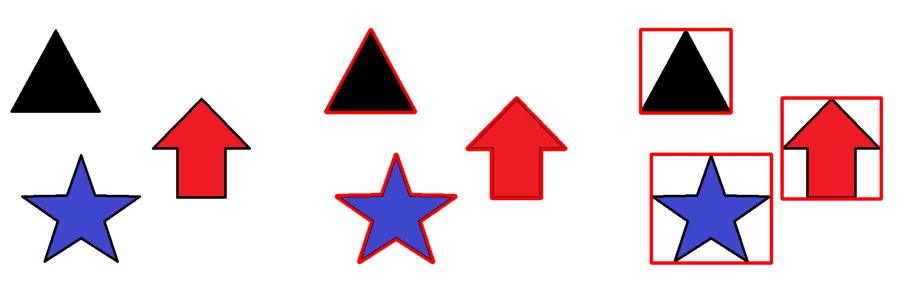

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img1 = cv.imread('teste.png')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img1,cv.COLOR_RGB2GRAY)


img3 = img2.copy()
for lin in range(img2.shape[0]):   
  for col in range(img2.shape[1]):
    
    pixel = img2.item(lin,col)
    if ( pixel > 254 ):
      img3.itemset( (lin,col), 0)
    else:
      img3.itemset( (lin,col), 255)

#determinar os contornos da imagem
contornos, ordem = cv.findContours(img3,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
print("Total objetos = {0}".format(len(contornos)))

#visualizar os contornos
img4 = img1.copy()
contornos = sorted(contornos,key=cv.contourArea)
cv.drawContours(img4,contornos,-1,(255,0,0), 5)

img5 = img1.copy()

#extrair o bounding box (caixa delimitadora)
for i in range(len(contornos)):
  cont = contornos[i]
  x,y,w,h = cv.boundingRect(cont)
  cv.rectangle(img5,(x,y),(x+w,y+h),(255,0,0),5)



plt.figure(figsize=(16,12))
plt.subplot(131), plt.imshow(img1), plt.axis("off")
plt.subplot(132), plt.imshow(img4), plt.axis("off")
plt.subplot(133), plt.imshow(img5), plt.axis("off")

plt.show()

#Exercício 2

1


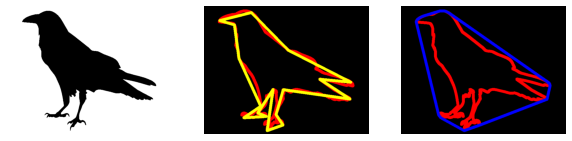

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img1 = cv.imread('crow_draw.png')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)

img2 = cv.cvtColor(img1,cv.COLOR_RGB2GRAY)


img2 = img2.copy()
for lin in range(img2.shape[0]):   
  for col in range(img2.shape[1]):
    
    pixel = img2.item(lin,col)
    if ( pixel > 200 ):
      img2.itemset( (lin,col), 0)
    else:
      img2.itemset( (lin,col), 255)



#extrair os contornos da imagem
contornos, ordem = cv.findContours(img2,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
print(len(contornos))

#produzir uma imagem binária para visualizar o contorno
img3 = np.zeros((img2.shape[0],img2.shape[1]),dtype=np.uint8)
img3 = cv.cvtColor(img3,cv.COLOR_GRAY2RGB)

img4 = np.zeros((img2.shape[0],img2.shape[1]),dtype=np.uint8)
img4 = cv.cvtColor(img4,cv.COLOR_GRAY2RGB)

#visualizar o contorno
cv.drawContours(img3,contornos,-1,(255,0,0),10)
cv.drawContours(img4,contornos,-1,(255,0,0),10)

#
# contorno aproximado
#
contorno = contornos[0]
epsilon = 0.01 * cv.arcLength(contorno, True)
aprox = cv.approxPolyDP(contorno, epsilon, True)
cv.drawContours(img3,[aprox],-1,(255,255,0),10)

#
# contorno convexo
#
hull = cv.convexHull(contorno)
cv.drawContours(img4,[hull],-1,(0,0,255),10)

plt.figure(figsize=(10,8))
plt.subplot(131), plt.imshow(img2,cmap='binary'), plt.axis("off")
plt.subplot(132), plt.imshow(img3), plt.axis("off")
plt.subplot(133), plt.imshow(img4), plt.axis("off")
plt.show()

#Exercício 3

Total contornos encontrados = 3
Area do contorno 1: 0.0
Area do contorno 2: 3946.0
Area do contorno 3: 5786.5


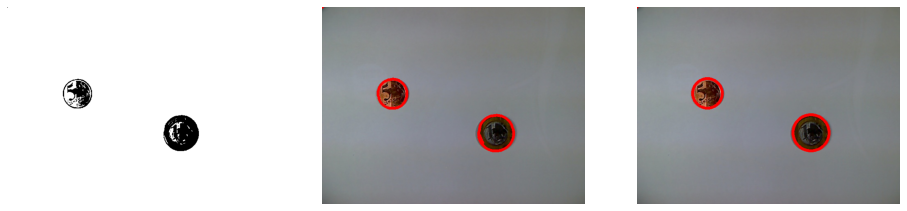

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img1 = cv.imread('moedas_105.jpg')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img1,cv.COLOR_RGB2GRAY)


img3 = img2.copy()
for lin in range(img2.shape[0]):   
  for col in range(img2.shape[1]):
    
    pixel = img2.item(lin,col)
    if ( pixel > 62 ):
      img3.itemset( (lin,col), 0)
    else:
      img3.itemset( (lin,col), 255)

#determinar os contornos da imagem
contornos, ordem = cv.findContours(img3,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
print("Total contornos encontrados = {0}".format(len(contornos)))

#visualizar os contornos
img4 = img1.copy()
contornos = sorted(contornos,key=cv.contourArea)
cv.drawContours(img4,contornos,-1,(255,0,0), 5)

img5 = img1.copy()


# temp = []
# for i in range(len(contornos)):
#   if not (ordem[0,i,1] == -1):
#     temp.append(contornos[i])

# print(len(temp))

#extrair o bounding box (caixa delimitadora)
for i in range(len(contornos)):
  cont = contornos[i]
  (x,y), raio = cv.minEnclosingCircle(cont)
  centro = (int(x),int(y))
  cv.circle(img5,centro,int(raio),(255,0,0),5)

for i in range(len(contornos)):
  print("Area do contorno " + str(i + 1) + ": " + str(cv.contourArea(contornos[i])))

plt.figure(figsize=(16,12))
plt.subplot(131), plt.imshow(img3, cmap= 'binary'), plt.axis("off")
plt.subplot(132), plt.imshow(img4), plt.axis("off")
plt.subplot(133), plt.imshow(img5), plt.axis("off")

plt.show()